# 图21 分类变量的直方图

分类变量的直方图显示了该变量的频率分布。通过为条形着色，可以将分布与表示颜色的另一个分类变量一起可视化。

原代码运行报错`The number of FixedLocator locations (16), usually from a call to set_ticks, does not match the number of ticklabels (15).`，因为`labels=np.unique(df[x_var]).tolist()`长度为15而`bins`长度为16，可以在`labels`后面`append('')`

D:\code\platform\Deep-Learning-Framework\doc\Plot\require.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


1.23.5
2.0.0
3.7.1
0.12.2


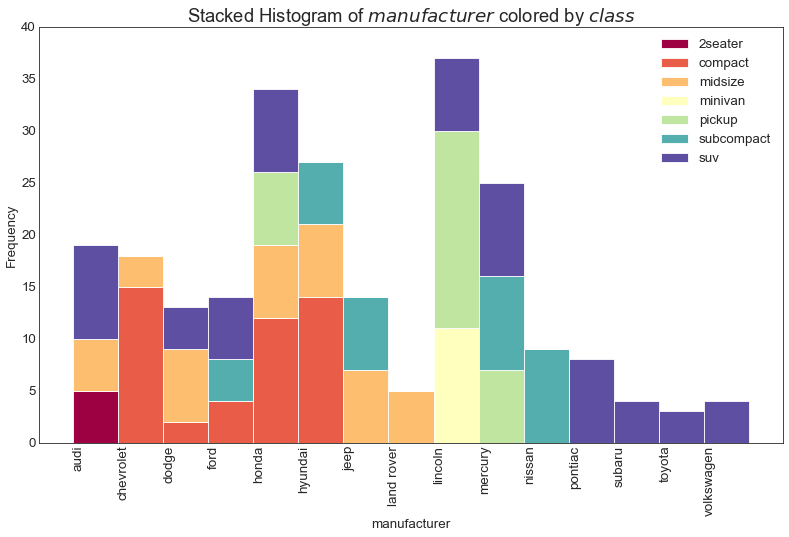

In [1]:
from doc.Plot.require import *

# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
# df = pd.read_csv("../data/mpg_ggplot2.csv")

# Prepare data
x_var = 'manufacturer'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16, 9), dpi=60)
colors = [plt.cm.Spectral(i / float(len(vals) - 1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group: col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 40)
labels = np.unique(df[x_var]).tolist()
labels.append('')
plt.xticks(ticks=bins, labels=labels, rotation=90, horizontalalignment='left')

plt.show()